In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import time
import json
from datetime import datetime
from datetime import timedelta
from pylab import hist, show, xticks

%matplotlib inline

In [2]:
#data = pd.read_csv("fcc_comments.csv",header=0,low_memory=False,usecols=["date_submission"])
data = pd.DataFrame(json.load(open("ecfs_17-108_0.json")))

In [3]:
#read in submission date and reception data
dates = data["date_submission"].tolist()
subdates = data["date_received"].tolist()
startdate = datetime(2017,4,27,0,0,0) #set startdate to be April 27, 2017

In [4]:
testvals = dates
testvals2 = subdates

In [5]:
#convert times to forms datetime can work with
testtime = datetime.strptime(testvals[0][0:19],"%Y-%m-%dT%H:%M:%S")
testvals = [datetime.strptime(testval[0:19],"%Y-%m-%dT%H:%M:%S") for testval in testvals]

testtime2 = datetime.strptime(testvals2[0][0:19],"%Y-%m-%dT%H:%M:%S")
testvals2 = [datetime.strptime(testval2[0:19],"%Y-%m-%dT%H:%M:%S") for testval2 in testvals2]

In [6]:
tdelta = testvals[0]-startdate
print(tdelta.total_seconds())

14400.0


In [7]:
#get seconds between startdate and submission time
testvals = [(testval-startdate).total_seconds() for testval in testvals]
testvals2 = [(testval2-startdate).total_seconds() for testval2 in testvals2]

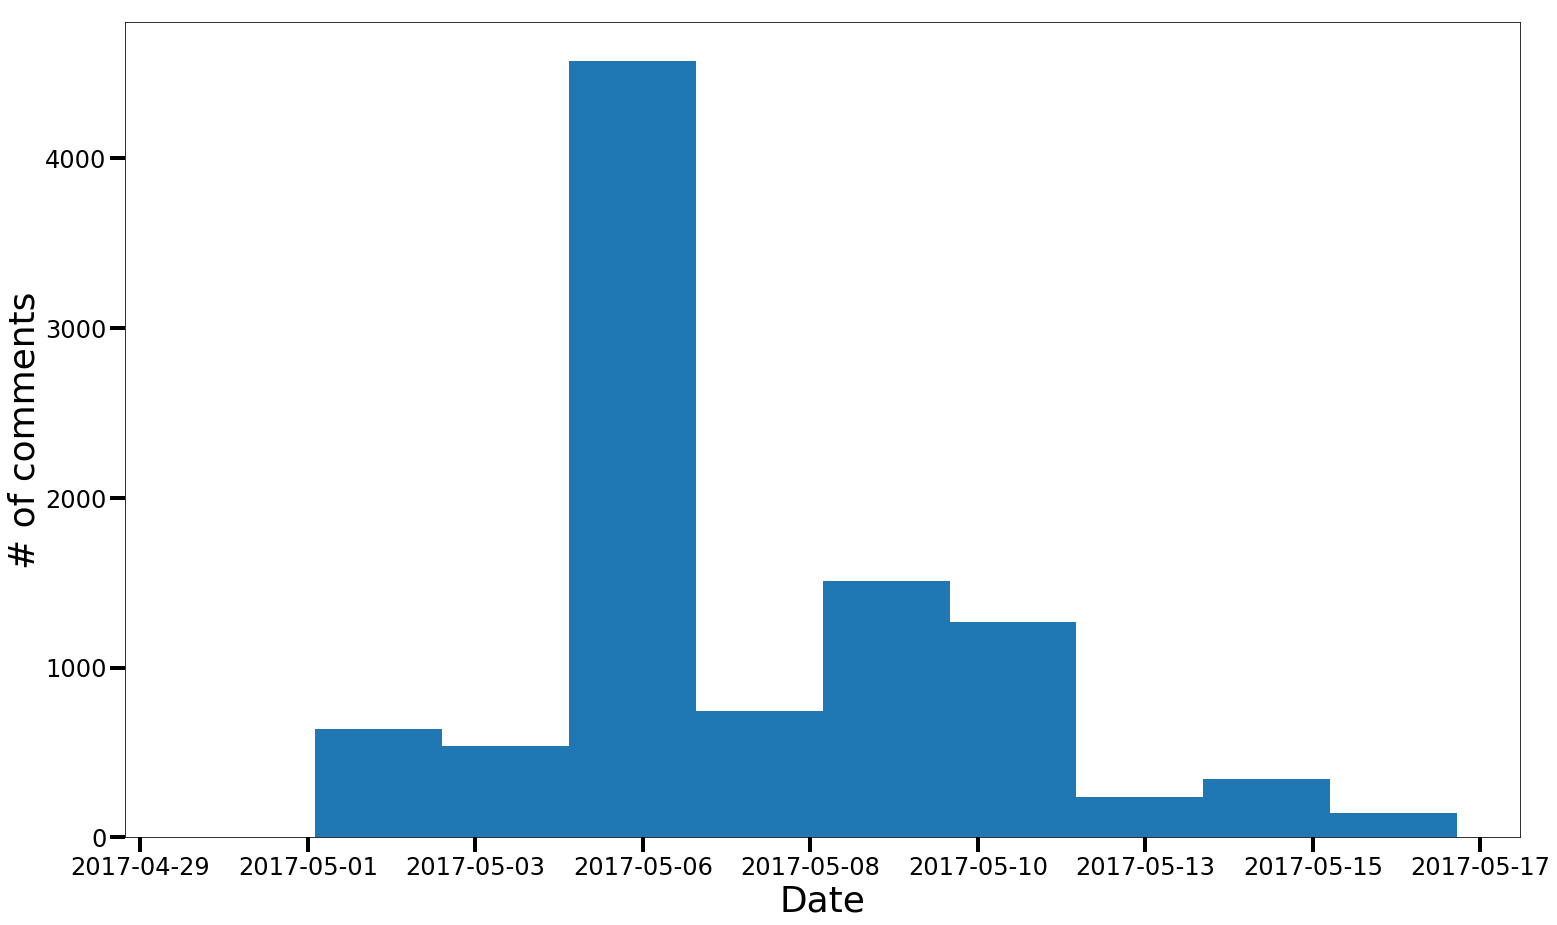

In [8]:
#submission
fig = plt.figure(figsize=[25,15])
ax = fig.add_subplot(1,1,1,)

plt.hist(testvals)
labels_sec = range(0,2000001,200000)
labels = [str(timedelta(seconds=labelsecs)+startdate)[0:10] for labelsecs in labels_sec]
ax.axes.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(direction='out', length=15, width=4)
plt.xlabel("Date",fontsize=36)
plt.ylabel("# of comments",fontsize=36);

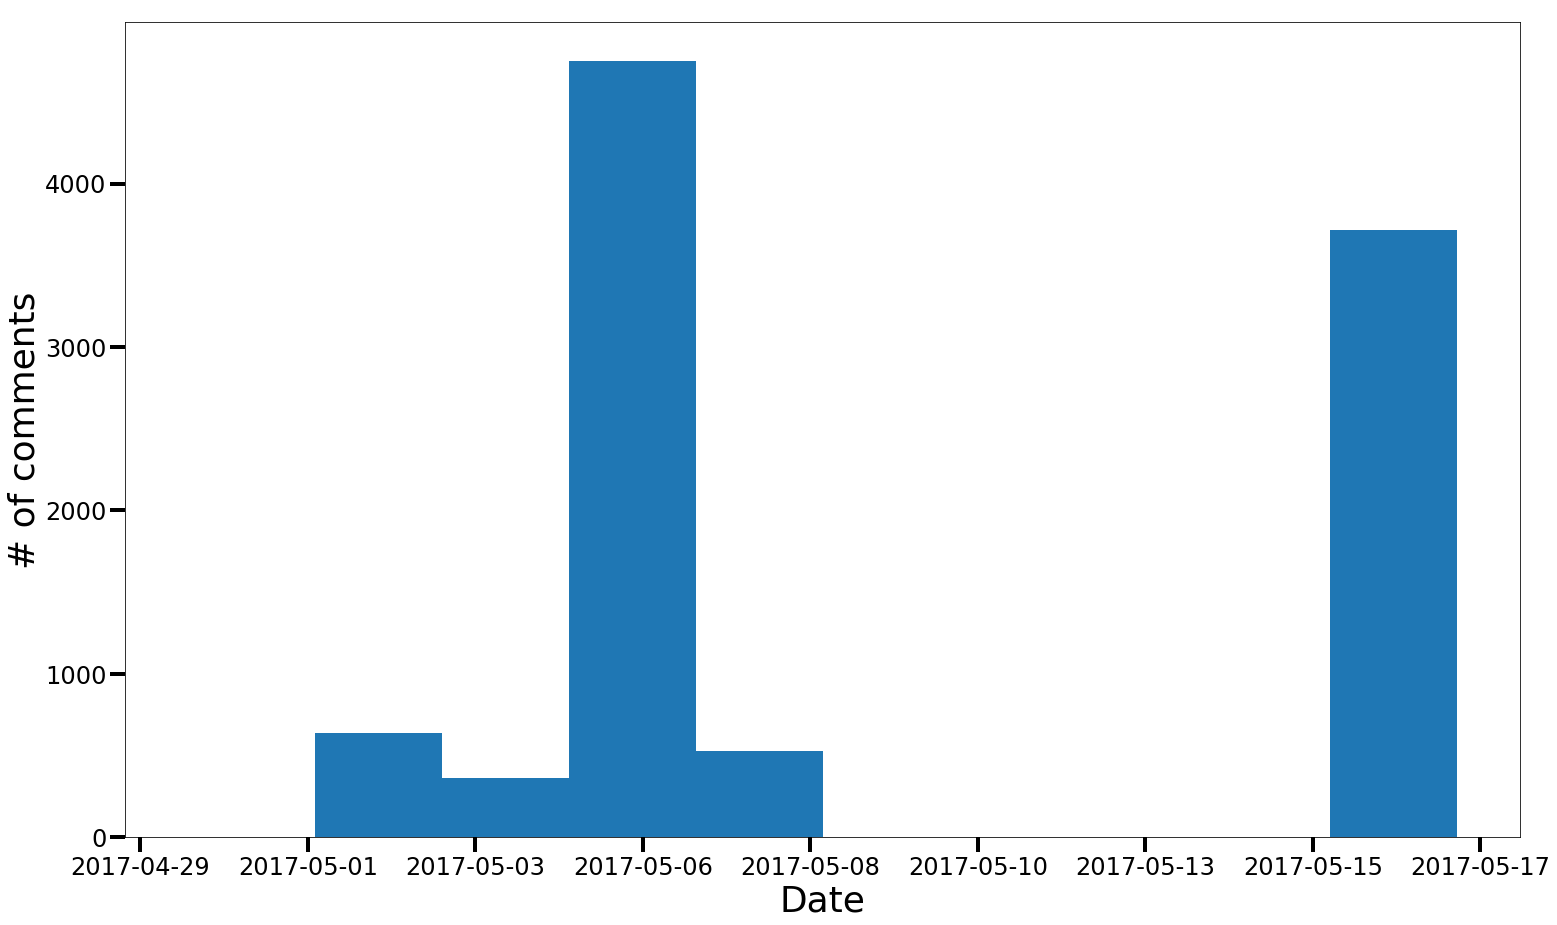

In [9]:
#reception
fig = plt.figure(figsize=[25,15])
ax = fig.add_subplot(1,1,1,)

plt.hist(testvals2);#,bins=20);
labels_sec = range(0,2000001,200000)
labels = [str(timedelta(seconds=labelsecs)+startdate)[0:10] for labelsecs in labels_sec]
ax.axes.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(direction='out', length=15, width=4)
plt.xlabel("Date",fontsize=36)
plt.ylabel("# of comments",fontsize=36);